# Homework 1 

### This is the solution of:
* Tor Djupman
* Isac Östman
* Felix Svedberg

# General Instructions
 
* Pass this assignment requires to complete the Jupyter notebook by
    + providing correct answers to all the theoretical exercises
    + providing **complete and runnable computer code** producing results that you think are **correct** to all the computational problems. 
    + providing **discussion** of your results including the **requested output (e.g., tables, graphs etc.).

* For the theoretical exercises, please include intermediate steps to
  explain how you arrive at your solution.
* Don't overengineer your code, keep it as simple and readable as possible   and provide short code comments to help other people understanding your     code.

* Up to 3 students can jointly submit the solutions. **Only 1 student from each group** is supposed to submit to Canvas.

* Submit your modified notebook and any auxillary files. Name your file `lab_01_GroupX_name1_name2_name3` where you replace name1, name2, name3 by your actual names, and X by your group number.

##### Happy coding!

## Problem 1

In Lecture 2, we introduced the __central finite difference operator__
$$
\partial^0 u(x)
=  \dfrac{u(x+h) - u(x-h)}
{2h}
\approx u'(x)
$$
as an approximation of the first  derivative $u'(x)$. For the first derivative, we also have 
$$\text{forward difference: } 
\partial^+ u(x)
=  \dfrac{u(x+h) - u(x)}
{h}
\approx u'(x)
$$
$$\text{backward difference: }
\partial^- u(x)
=  \dfrac{u(x) - u(x-h)}
{h}
\approx u'(x)
$$

**a)** Use Taylor expansion to compute 
$$
 \partial^0u(x) - u'(x),  
$$
$$
 \partial^+u(x) - u'(x),  
$$
$$
 \partial^-u(x) - u'(x),  
$$
assuming $u \in C^3([0,1])$. 

__Answer:__

Using the formula $$u(x+H) = u(x) + Hu'(x)+ \frac{H^2}{2} u''(x) + \frac{H^3}{6} u'''(x),$$ where all terms of order 4 are omitted because $u \in C^3([0,1])$, we rewrite all expressions for the differences using the adequate value of $H$ ($h$ or $-h$ in this case). For the central difference, this method yields:
$$\frac{u(x+h)- u(x-h)}{2h} = \frac{((u(x) + hu'(x)+ \frac{h^2}{2} u''(x) + \frac{h^3}{6} u'''(x)))-(u(x) - hu'(x)+ \frac{h^2}{2} u''(x) - \frac{h^3}{6} u'''(x))}{2h}$$
which simplifies to 

$$\frac{1}{2h}(2hu'(x)+2\frac{h^3}{6}u'''(x))=u'(x) + \frac{h^2}{6}u'''(x).$$ Finally, subtracting $$u'(x)$$ gives: 
$$\partial^0u(x) - u'(x) = u'(x) + \frac{h^2}{6}u'''(x) - u'(x) = \frac{h^2}{6}u'''(x)$$



**b)** Solve Problem 1c in the exam 2025-08-18. You find this exam on Canvas course webpage.

__Answer:__

In problem 1c we want to find the order q in the $\mathcal{O}(h)$ of the following expression:
$$u_{xx}=\frac{u(x)-2u(x+h)+u(x+2h)}{h^2}+\mathcal{O}(h^q).$$
We can start by noticing that the expression can be written like:
$$(A_h \vec{u})_i=f_i+\tau_i$$
where $\tau$ is the truncation error. So, what we essentially want to do is that we want to find the leading term of the truncation error. We see from the first expression that our $f_i$ is equal to $\partial^+ \partial^+ u(x)$.
We continue by using the formula for Taylor expansion
$$u(x+H) = u(x) + Hu'(x)+ \frac{H^2}{2} u''(x) + \frac{H^3}{6} u'''(x)$$
to expand the terms in the fraction of the first expression to find the terms which are not cancelled.
We begin by using the taylor expansion formula on the fraction. The first term is simply $u(x),$ but the others give:
$$\frac{1}{h^2}(-2u(x+h))=\frac{1}{h^2}(-2u(x)-2hu'(x)-2\frac{h^2}{2}u''(x)-2\frac{h^3}{6}u'''(x)-. \ . \ .)$$
and
$$\frac{1}{h^2}(u(x+2h))=\frac{1}{h^2}(u(x)+2hu'(x)+\frac{4h^2}{2}u''(x)+\frac{8h^3}{6}u'''(x)-. \ . \ .).$$
The result from adding the terms give us that
$$\frac{u(x)-2u(x+h)+u(x+2h)}{h^2}=\frac{1}{h^2}(h^2u''(x)+h^3u'''(x)+. \ . \ .) = u''(x)+hu'''(x).$$
From the equation of truncation error we get that the leading term is $hu'''(x),$ and thus the answer is that $q=1$.






## Problem 2
In this problem set you are asked to solve the Poisson problem
$$
- u''  = f \quad \text{in } (0,1)
$$
numerically for various types of boundary conditions.

**a)** Start with implementing the finite difference method (FDM)
from Lecture 2 using the right-hand side
$$
f = (2\pi)^2 \cos(2 \pi x)
$$
and boundary conditions
$$u(0) = u(1) = 1.$$
Plot the solutions for different mesh sizes $h = 1/N$
with $N = 4, 8, 16, 32, 64$ in the *same* plot. 
Find the *exact* analytical solution $u$ to the given Poisson problem (Hint: it should be very similar to $f$) and plot it for $N = 64$ into the same figure. 
Does your computed discrete solution $U$ converge to $u$? Note that these solutions shall be plotted in a way that they are easily distinguishable in the figure, for example by using different colors, markers and adding legend.

__Answer:__ 

We see in the plot that when we increase N, the solution approaches our exact solution $u$.

**b)** Next, we switch to a Neumann boundary condition
on the left endpoint; that is that we consider the following
the boundary conditions:
$$ u'(0) = 0, \quad u(1) = 1.$$
Modify your FDM solver to incoporate the Neumann condition based on the one-side apprioximation
$$ u'(0)\approx \frac{u(h) - u(0)}{h}$$
Is the analytical solution the same as in a)? Conduct a similar numerical study as in part a). What do you observe regarding the accuracy of the
method?

__Answer:__

The solution has a much larger error for lower values of N, especially on the side which has the Neumann BC.

**c)** Now use Neumann boundary conditions everywhere; that is, take
$$ u'(0) = 0,\quad u'(1) = 0$$
and try to solve the resulting Poisson problem.
What happens when you try to solve the linear algebra system? Why? 

__Answer:__

When we try to solve the linear algerba system we get the error "The matrix is singular". This means, among other things, that the equation $$A_h v_i=f_i$$ has infinitely many solutions (or none). To understand how having two Neumann conditions causes this, one can also state it in a more intuitive way: say that we only know the derivatives at the boundary for the function from 2b). In that case, we could essentially move the solution up and down along the y-axis arbitrarily and still have a solution that satisfies the derivate boundary conditions, meaning that we have infinitely many solutions.    



Text(0.5, 1.0, 'Problem 2a)')

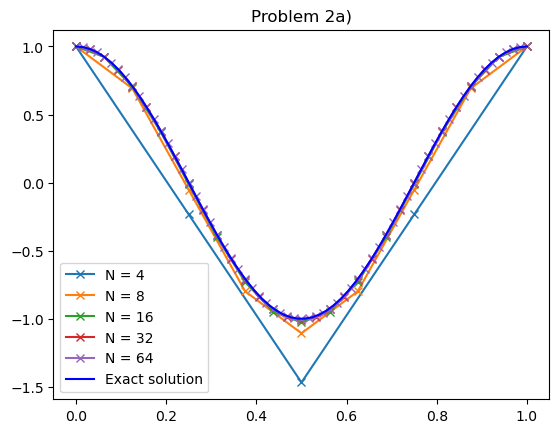

In [25]:
## Problem 2a) ##

# Arrary and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt

plt.figure
for N in [4, 8, 16, 32, 64]:
	
	x = np.linspace(0,1,N+1)

	A = np.zeros((N+1, N+1))

	h = 1/N

	for i in range(1, N):
		A[i, i-1] = -1
		A[i, i+1] = -1
		A[i, i] = 2

	F = (2*np.pi)**2*np.cos(2*np.pi*x)

	# Dirichlet
	A[0,0] = 1
	F[0] = 1

	A[N,N] = 1
	F[N] = 1

	# scaling A 
	A[1:N,:] = A[1:N,:] / h**2

	U = la.solve(A, F)
	#  "x-r" means mark data points as "x", connect them by a line and use red color
	
	plt.plot(x, U, "x-")

# exact solution
x = np.linspace(0,1,64)
exactsol = np.cos(2*np.pi*x)
plt.plot(x,exactsol,"b")
plt.legend(["N = 4","N = 8","N = 16","N = 32","N = 64","Exact solution"])
plt.title("Problem 2a)")



Text(0.5, 1.0, 'Problem 2b)')

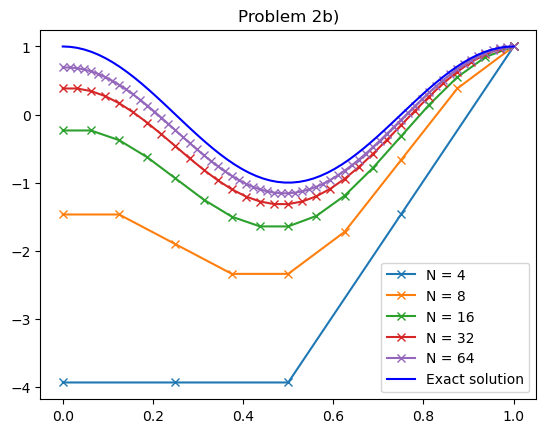

In [29]:
## Problem 2b) ##
plt.figure
for N in [4, 8, 16, 32, 64]:
	
	x = np.linspace(0,1,N+1)

	A = np.zeros((N+1, N+1))

	h = 1/N

	for i in range(1, N):
		A[i, i-1] = -1
		A[i, i+1] = -1
		A[i, i] = 2

	F = (2*np.pi)**2*np.cos(2*np.pi*x)

	# Neumann and Dirichlet
	A[0,0] = -1
	A[0,1] = 1
	F[0] = 0

	A[N,N] = 1
	F[N] = 1

	# scaling A 
	A[1:N,:] = A[1:N,:] / h**2

	U = la.solve(A, F)
	#  "x-r" means mark data points as "x", connect them by a line and use red color
	
	plt.plot(x, U, "x-")

# exact solution
x = np.linspace(0,1,64)
exactsol = np.cos(2*np.pi*x)
plt.plot(x,exactsol,"b")
plt.legend(["N = 4","N = 8","N = 16","N = 32","N = 64","Exact solution"])
plt.title("Problem 2b)")


In [27]:
## Problem 2b) ##
plt.figure
for N in [4, 8, 16, 32, 64]:
	
	x = np.linspace(0,1,N+1)

	A = np.zeros((N+1, N+1))

	h = 1/N

	for i in range(1, N):
		A[i, i-1] = -1
		A[i, i+1] = -1
		A[i, i] = 2

	F = (2*np.pi)**2*np.cos(2*np.pi*x)

	# Neumann
	A[0,0] = -1
	A[0,1] = 1
	F[0] = 0

	A[N,N] = 1
	A[N,N-1] = -1
	F[N] = 0

	# scaling A 
	A[1:N,:] = A[1:N,:] / h**2

	U = la.solve(A, F)
	#  "x-r" means mark data points as "x", connect them by a line and use red color
	
	plt.plot(x, U, "x-")

# exact solution
x = np.linspace(0,1,64)
exactsol = np.cos(2*np.pi*x)
plt.plot(x,exactsol,"b")
plt.legend(["N = 4","N = 8","N = 16","N = 32","N = 64","Exact solution"])
plt.title("Problem 2b)")


LinAlgError: Matrix is singular.

## Problem 3

The goal of this problem is to investigate the numerical error introduced by the FDM more quantitatively and to familiarize us with the **method of manufactured solution**.

The idea is to assess the accurracy and correctness of a PDE solver implementation by constructing a know reference solution which solves the PDE problem at hand. This can be simply done by picking a meaningful and not too boring analytical solution
and explicitly calculate the data which need to be supplied, e.g.,
the right-hand side or boundary values for various boundary condition.

For instance, taking the function $u(x) = x + \cos(2 \pi x)$, we can simply calculate that
\begin{align}\notag
 u'(x) &= 1 - 2\pi \sin(2\pi x)
 \\ \notag
 u''(x) &= - (2\pi)^2 \cos(2\pi x)
\end{align}
and thus $u$ satisfies the Poisson problem
$$
-u''(x) = (2\pi)^2 \cos(2\pi x)
$$
with boundary conditions
$$
u'(0) = 1, \quad u(1) = 2.
$$

With a known reference solution at hand we can compute
the error vector $u_i - U_i$ at the grid points $\{x_i\}_{i=0}^N$
for a series of successively refined grid, e.g. by taking
$N = 4\cdot2^k$ for $k = 0, 1, 2, 3$ etc.

Reducing the mesh size $h$ by half allows us to easily compute
the **experimental order of convergence (EOC)**,
that is the observed error reduction in the numerical solution
when passing from a coarser mesh with mesh size $h$ to
to a finer mesh with $h/2$.
The EOC can then be compare with the theoretically predicted error reduction (if known).

For instance, if you know that the discretization error $E(h)$ given on mesh
with mesh size $h$ and measured in some norm $ \| \cdot \| $ behaves like 
$\| E(h) \| \sim h^q$, you can conclude that  
$$
\dfrac{\|E(h/2)\|}{\|E(h)\|} \sim \dfrac{(h/2)^q}{h^q} = (1/2)^q
$$
when passing from $h$ to half the mesh size $h/2$. Taking the logarithm
of the last equation shows 
$$
q \sim \dfrac{\ln\bigl(\|E(h)\|/\|E(h/2)\|\bigr)}{\ln 2}. 
$$
(Verify this!)
Thus the EOC for each mesh size h is measured by the 
$$
EOC(h) = \dfrac{\ln\bigl(\|E(h)\|/\|E(h/2)\|\bigr)}{\ln 2}.
$$

Alternatively, you can do a log-log plot of your error as function of $h$,
that is plot $\ln (\| E(h)\|)$ againts $\ln(h)$. Then the slope of this
plot should be $\sim q$ if we expect the method to be of convergence order $q$.

a) Use this approach to verify your FDM program by computing the error for $N= 4, 8, 16, 32, 64$ in the maximum norm. Start with Dirichlet boundary conditions at $x=0$ and $x=1$. 
Give the corresponding $\log$-$\log$ plot and report your convergence order.

b) Change to Neumann boundary condition at $x=0$. Do you achieve 2nd order convergence? Why?

c) To improve the method, we shall modify the finite difference stencil for approximating the Neumann boundary condition. First, by using the centered difference at $x=0$, we have $$f(0) = -u^{"}(0) \approx -\frac{u(-h) -2u(0)+ u(h)}{h^2}.$$ Here, the point $x=-h$ is outside the domain $[0,1]$, and is often referred to as the ghost point. The above equation gives us the approximation of $u(-h)$, which can be used to approximate the Neumann boundary condition by using again the centered difference $$ u'(0)\approx \frac{u(h) - u(-h)}{2h}.$$ Using this approach, do you get 2nd order convergence? Why?


### Useful code snippets

While we won't use the Python data analysis libray `pandas` extensively in this course, it comes in very handy if you want to print all kinds of data in a pretty way.

Here is an example of how to use `pandas` to diplay convergence rate tables
nice within the Jupyter notebook.

In [ ]:
# Import pandas 
import pandas as pd
# and numpy (only to provide a complete example here)
import numpy as np

# Import functions which provides nice rendering of data.
from IPython.display import display

# Create a list refinement levels
refs = [ 4*2**k for k in range(0,4)]
print("N")
print(refs)

# Generating some dummy data just for illustration purpose.
# You have to create your np arrays for errors and eocs

errors = np.random.randn(4)
eocs = np.random.randn(4)
print("errors")
print(errors)
print("eocs")
print(eocs)


# Make a dictionary containing the data set
# consisting of a column labeled "Errors"
# and one labeled "EOC"
data = {"Errors":errors, "EOC":eocs}

# Create a dataframe (basically just a 2D table in our case)
# and use N as index
df = pd.DataFrame(data, index=refs)

# A Python dict does not store the keys in a sorted way.
# The next line sorts the columns according the list
#["Errors", "EOC"] 
df = df[["Errors", "EOC"]]

# Finally give the index column a name as well
df.index.name="N"


# 2 possibilities to pretty print the dataframe
display(df)
#HTML(df.to_html())

## Problem 4

In the final computer exercise you are asked to extend your FDM solver in order to compute a solution to the *Advection-Diffusion problem*
$$
- \epsilon u''(x) + b u'(x) = f(x) \quad \text{for } x \in (0,1),
\\
u(0) = u(1) = 0,
$$
with $b = 1$ and various $\epsilon$ tending $0$. While for $\epsilon > 0$,
the problem is clearly a 2nd order problem, its characteristics
change drastically for $\epsilon \to 0$. Formally, the limit equation
is given by the **first order** problem
$$
b u'(x) = f(x) \quad \text{for } x \in (0,1)
$$
and we see immediately that only *one* boundary condition should
be required in the limit case. (Convince yourself by assuming that $f = 1$ and trying to compute a solution). It turns out that it is natural to impose a Dirichlet boundary condition $u(0) = u_0$ only at the "inflow point" $x(0)$ and thus
the "outflow point" $u(1) = u_1$ becomes "superfluous" when $\epsilon \to 0$. Here, we will study what happens to our FDM solver when we gradually approache this limit case.

**a)** Compute $f$ such that
\begin{align*}
  u(x)
  = x - 
  \dfrac{e^{(x-1)/\epsilon} - e^{-1/\epsilon}}
  {1 - e^{-1/\epsilon}}
\end{align*}
is an exact solution for $b = 1$ and arbitrary $\epsilon$
(Hint: $f$ should not look too complicated...).

**b)**
Start with using the symmetric/central difference operator
$$
\partial^0 U_i = \dfrac{U_{i+1} - U_{i-1}}{2h}
$$
to discretize the first order derivative $b u'(x)$.
How does the resulting matrix system for the Advection-Diffusion problem look like? Adapt your FDM solver from Problem 3 accordingly and verify your implementation using the exact solution from a) for 
$\epsilon=1$. Plot your numerical solution and the analytical solution in the same figure for a mesh size of your choice.

**c)** Now repeat the numerical experiment and compute
a numerical solution $U_{\epsilon}$ for
$\epsilon = 0.1, 0.01. 0.001$ and at least $4$ successively refined
grids. For each $\epsilon$ provide a plot including the exact
solution and the computed approximations. What do you observe?

Report the EOC, this time
in a 2 column table with the first column reporting the mesh size
and the second column reporting the computed error. Is the error
reduced by a factor $4$ as expected from a 2nd order convergent method?
Recover order $2$ by making the meshes even finer.

**d**) Finally, again, conduct the same experiment
after replacing $\partial^0$ by 1) $\partial^+$ and 2) $\partial ^-$.
Describe your observations of the discrete solution behavior.
Which variant gives the most satisfying/robust solution
for small $\epsilon$?